In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#!/home/dattalab/code/ArenaSDK_v0.1.68_Linux_x64/ArenaSDK_Linux_x64/Utilities/IpConfigUtility /list

In [1]:
from multicamera_acquisition.interfaces.arduino import (
    packIntAsLong,
    wait_for_serial_confirmation,
)
import struct
import time
import numpy as np


from multicamera_acquisition.paths import ensure_dir
from multicamera_acquisition.acquisition import acquire_video

c:\users\dattalab\documents\multicamera_acquisition\multicamera_acquisition\interfaces\arduino.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
from  multicamera_acquisition.interfaces.camera_lucid import find_helios_devices

In [3]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

In [4]:
# from multicamera_acquisition.usb_utils import reset_usb

In [5]:
# import usb.core
# l = list(usb.core.find(find_all=True))

In [6]:
# reset_usb(products=[
#     "a2A1920-160umBAS",
#     "Azure Kinect 4K Camera", 
#     "Azure Kinect Depth Camera", 
#     "Azure Kinect Microphone Array"
# ], verbose=True)

### Check lucid helios devices

In [7]:
from arena_api.system import system
# Destroy device. Optional, implied by closing of module
system.destroy_device()
print("Destroyed all created devices")

Destroyed all created devices


In [8]:
devices = find_helios_devices()
camera_serials = np.array([c.nodemap['DeviceSerialNumber'].value for c in devices])
print(f'Serial numbers: {camera_serials}')

Serial numbers: ['232701394']


In [ ]:
system.destroy_device()
print("Destroyed all created devices")

### Check kinect devices
- If an "error" is observed, unplug and replug them, then reset the notebook

In [9]:
from multicamera_acquisition.interfaces.camera_azure import get_camera_indexes
get_camera_indexes()

'k4arecorder' is not recognized as an internal or external command,
operable program or batch file.


## Set up the camera

In [15]:
recording_duration_s = 10  # seconds
framerate = 30  # 30, 60, 90, 120
exposure_time= 950 # 1000s
save_location = f'/home/dattalab/Videos/'
ensure_dir(save_location)
quality = 15
gain = 30
display = False
# camera_list = [
#     # azure
    
#         { 'name': 'azuretop', 'serial': '000483621712', 'brand':'azure', 'gpu':0, "display":True, "quality": quality},
#         {'name': 'lucidtop', 'serial': '232701394', 'brand':'lucid', 'gpu':0, "display":True, "quality": quality},
#    ]

### Helios recording

In [ ]:
camera_list = [
        {'name': 'lucidtop', 'serial': '232701394', 'brand':'lucid', 'gpu':0, "display":True, "quality": quality, "display_range": (400, 575)},
]

In [ ]:
system.destroy_device()
print("Destroyed all created devices")

In [ ]:
#output_location, camera_list = acquire_video(
output_location, camera_list = acquire_video(
    save_location,
    camera_list,
    frame_timeout = 1000, # how long to allow frames to attempt to grab bpcie lanesefore a timeout
    azure_recording=False,
    azure_framerate = 30,  # azure's frame rate in this case.
    framerate=framerate,
    display_framerate = 30,  # 30
    recording_duration_s = recording_duration_s,
    serial_timeout_duration_s=0.1,
    overwrite=True,
    append_datetime=True,
    dropped_frame_warnings=True,
    max_video_frames = framerate * 60,
    verbose=True
    
)

### Azure recording

In [ ]:
from multicamera_acquisition.interfaces.camera_azure import get_camera_indexes
camera_list = [
        { 'name': 'azuretop', "azure_index": 0, 'serial': '000500221712', 'brand':'azure', 'gpu':0, "display":True, "quality": quality},
]

In [ ]:
#output_location, camera_list = acquire_video(
output_location, camera_list = acquire_video(
    save_location,
    camera_list,
    frame_timeout = 1000, # how long to allow frames to attempt to grab bpcie lanesefore a timeout
    azure_recording=True,
    azure_framerate = 30,  # azure's frame rate in this case.
    framerate=framerate,
    display_framerate = 30,
    recording_duration_s = recording_duration_s,
    serial_timeout_duration_s=0.1,
    overwrite=True,
    append_datetime=True,
    dropped_frame_warnings=True,
    max_video_frames = framerate * 60,
    verbose=True
    
)

In [ ]:
logger.setLevel(logging.WARNING)

### Count frames

In [15]:
import imageio
from pathlib import Path

In [16]:
# count each frame
for camera_dict in camera_list:
    name = camera_dict["name"]
    serial_number = camera_dict["serial"]
    try:
        video_file = Path(output_location) / f"{name}.{serial_number}.avi"
        vid = imageio.get_reader(video_file.as_posix(),  'ffmpeg')
    except:
        video_file = Path(output_location) / f"{name}.{serial_number}.mp4"
        vid = imageio.get_reader(video_file.as_posix(),  'ffmpeg')
    num_frames=vid.count_frames()
    print(f"Frames ({name}):", num_frames)

Frames (lucidtop): 285


### Plot frames

In [17]:
from pathlib2 import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#plt.set_loglevel(level = 'error')

DEBUG:matplotlib:matplotlib data path: /home/dattalab/anaconda3/envs/multicam/lib/python3.10/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:CONFIGDIR=/home/dattalab/.config/matplotlib
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is linux
DEBUG:matplotlib:CACHEDIR=/home/dattalab/.cache/matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /home/dattalab/.cache/matplotlib/fontlist-v330.json
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.


In [18]:
video_out = output_location

In [19]:
name = camera_list[0]['name']
df = pd.read_csv(list(video_out.glob(f'{name}*.csv'))[0])

In [20]:
df

frame_id  frame_timestamp  frame_image_uid  queue_size
0           0     380409925552     1.700495e+09           0
1           1     380443258032     1.700495e+09           0
2           2     380476590512     1.700495e+09           0
3           3     380509922992     1.700495e+09           0
4           4     380543255472     1.700495e+09           0
..        ...              ...              ...         ...
280       280     389743142672     1.700495e+09           0
281       281     389776475152     1.700495e+09           0
282       282     389809807792     1.700495e+09           0
283       283     389843140272     1.700495e+09           0
284       284     389876472752     1.700495e+09           1

[285 rows x 4 columns]

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/dattalab/anaconda3/envs/multicam/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralItalic.ttf', name='STIXGeneral', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/dattalab/anaconda3/envs/multicam/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/dattalab/anaconda3/envs/multicam/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Oblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=400, stretch='normal', si

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/dattalab/anaconda3/envs/multicam/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 0.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/dattalab/anaconda3/envs/multicam/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBol.ttf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/dattalab/anaconda3/envs/multicam/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymReg.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/dattalab/anaconda3/envs/multicam/lib/python3.10/site-p

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSansMono-BoldOblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', name='Liberation Sans Narrow', style='italic', variant='normal', weight=700, stretch='condensed', size='scalable')) = 11.535
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/kacst/KacstNaskh.ttf', name='KacstNaskh', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/samyak/Samyak-Devanagari.ttf', name='Samyak Devanagari', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:fi

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/tlwg/Garuda-BoldOblique.ttf', name='Garuda', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/liberation2/LiberationSans-Bold.ttf', name='Liberation Sans', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSerifCondensed.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/opentype/urw-base35/NimbusSans-BoldItalic.otf', name='Nimbus Sans', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/opentype/urw-base35/C059-Bold.otf', name='C059', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/tlwg/TlwgTypo.ttf', name='Tlwg Typo', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/tlwg/TlwgTypewriter-Oblique.ttf', name='Tlwg Typewriter', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/malayalam/Meera-Regular.ttf', name='Meera', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/kacst-one/Kac

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/tlwg/Waree-Bold.ttf', name='Waree', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/tlwg/Sawasdee-BoldOblique.ttf', name='Sawasdee', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSansCondensed-BoldOblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=700, stretch='condensed', size='scalable')) = 1.535
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/opentype/urw-base35/P052-BoldItalic.otf', name='P052', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/tlwg/Norasi-Bold.ttf', name='Norasi', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/opentype/urw-base35/NimbusMonoPS-BoldItalic.otf', name='Nimbus Mono PS', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSerifCondensed-Bold.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-yrsa-rasa/Rasa-Regular.ttf', name='Rasa', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/samyak-fonts/Samyak-Tamil.ttf', name='Samyak Tamil', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/tlwg/TlwgTypist-Oblique.ttf', name='Tlwg Typist', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/droid/DroidSansFallbackFull.ttf', name='Droid Sans Fallback', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-yrsa-rasa/Yrsa-Regular.ttf', name='Yrsa', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/s

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/lohit-telugu/Lohit-Telugu.ttf', name='Lohit Telugu', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/opentype/malayalam/Chilanka-Regular.otf', name='Chilanka', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/opentype/urw-base35/C059-BdIta.otf', name='C059', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/liberation2/LiberationSans-BoldItalic.ttf', name='Liberation Sans', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/sh

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/dattalab/anaconda3/envs/multicam/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Oblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/dattalab/anaconda3/envs/multicam/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUni.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/dattalab/anaconda3/envs/multicam/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/cmr10.ttf', name='cmr10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/dattalab/anaconda3/envs/multicam/lib/python3.10/site-pack

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/dattalab/anaconda3/envs/multicam/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymReg.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/dattalab/anaconda3/envs/multicam/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/dattalab/anaconda3/envs/multicam/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/cmmi10.ttf', name='cmmi10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/dattalab/anaconda3/envs/multicam/lib/python3.10/site-pac

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/samyak/Samyak-Devanagari.ttf', name='Samyak Devanagari', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/Nakula/nakula.ttf', name='Nakula', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/liberation2/LiberationMono-Bold.ttf', name='Liberation Mono', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/tlwg/Kinnari-BoldItalic.ttf', name='Kinnari', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/t

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/opentype/urw-base35/NimbusSans-BoldItalic.otf', name='Nimbus Sans', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-gujr-extra/aakar-medium.ttf', name='aakar', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/tlwg/Purisa-Oblique.ttf', name='Purisa', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-guru-extra/Saab.ttf', name='Saab', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/t

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/malayalam/Meera-Regular.ttf', name='Meera', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/kacst-one/KacstOne-Bold.ttf', name='KacstOne', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', name='Liberation Mono', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/opentype/urw-base35/URWBookman-Light.otf', name='URW Bookman', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/opentype/urw-base35/P052-BoldItalic.otf', name='P052', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-beng-extra/LikhanNormal.ttf', name='Likhan', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSansMono-Bold.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/kacst/mry_KacstQurn.ttf', name='mry_KacstQurn', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/font

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-yrsa-rasa/Rasa-Regular.ttf', name='Rasa', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSans-ExtraLight.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=200, stretch='normal', size='scalable')) = 0.24
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/kacst-one/KacstOne.ttf', name='KacstOne', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/tlwg/Sawasdee.ttf', name='Sawasdee', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/freefont/FreeS

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-yrsa-rasa/Yrsa-Regular.ttf', name='Yrsa', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/tlwg/TlwgMono-Oblique.ttf', name='Tlwg Mono', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/tlwg/Norasi-Italic.ttf', name='Norasi', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/tlwg/Waree-Oblique.ttf', name='Waree', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/malayalam/RaghuMalay

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/liberation2/LiberationSans-BoldItalic.ttf', name='Liberation Sans', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSans-BoldOblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 1.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/tlwg/TlwgTypist.ttf', name='Tlwg Typist', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/opentype/urw-base35/NimbusRoman-Bold.otf', name='Nimbus Roman', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fnam

lucidtop


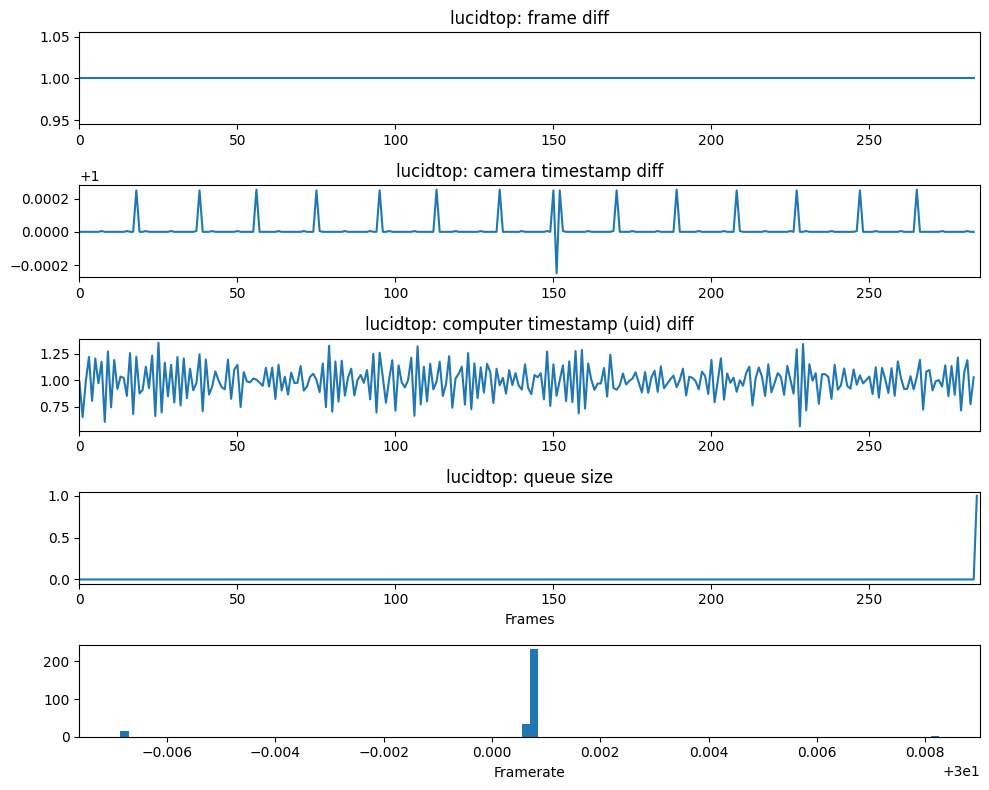

9.4665472
30.00037859632707


In [21]:
for cam in camera_list:
    name = cam['name']
    print(name)
    df = pd.read_csv(list(video_out.glob(f'{name}*.csv'))[0])
    fig, axs = plt.subplots(ncols = 1, nrows = 5, gridspec_kw= {'height_ratios':[1,1,1,1,1]}, figsize=(10,8))
    nrows = len(df)
    axs[0].set_title(f"{name}: frame diff")
    axs[0].plot(np.diff(df.frame_id.values))
    axs[0].set_xlim([0, len(df)])
    axs[1].set_title(f"{name}: camera timestamp diff")
    axs[1].plot(np.diff(df.frame_timestamp.values) / np.median(np.diff(df.frame_timestamp.values)))
    #axs[1].plot(np.diff(df.frame_timestamp.values))
    axs[1].set_xlim([0, len(df)])
    axs[2].set_title(f"{name}: computer timestamp (uid) diff")
    axs[2].plot(np.diff(df.frame_image_uid.values) / np.median(np.diff(df.frame_image_uid.values)))
    axs[2].set_xlim([0, len(df)])
    axs[3].set_title(f"{name}: queue size")
    axs[3].plot(df.queue_size.values)
    axs[3].set_xlim([0, len(df)])
    axs[3].set_xlabel('Frames')
    axs[4].hist(1/(np.diff(df.frame_timestamp.values)* 1e-9), bins=100);
    axs[4].set_xlabel('Framerate')
    plt.tight_layout()
    plt.show()
    
    time_elapsed = (df.frame_timestamp.values[-1] - df.frame_timestamp.values[0]) * 1e-9
    avg_framerate = np.mean(np.diff(df.frame_timestamp.values))
    print(time_elapsed)
    print(1 / (avg_framerate* 1e-9))

### Plot image

In [22]:
filename = Path(output_location) / f"{name}.{serial_number}.avi"

In [23]:
filename

PosixPath('/home/dattalab/Videos/23-11-20-10-36-08-366698/lucidtop.232701394.avi')

In [24]:
from multicamera_acquisition.video_utils import read_frames

(array([63835., 28928., 95205., 43537., 16517., 13960., 35516., 21528.,
        24381., 25233.]),
 array([   0. ,  237.8,  475.6,  713.4,  951.2, 1189. , 1426.8, 1664.6,
        1902.4, 2140.2, 2378. ]),
 <BarContainer object of 10 artists>)

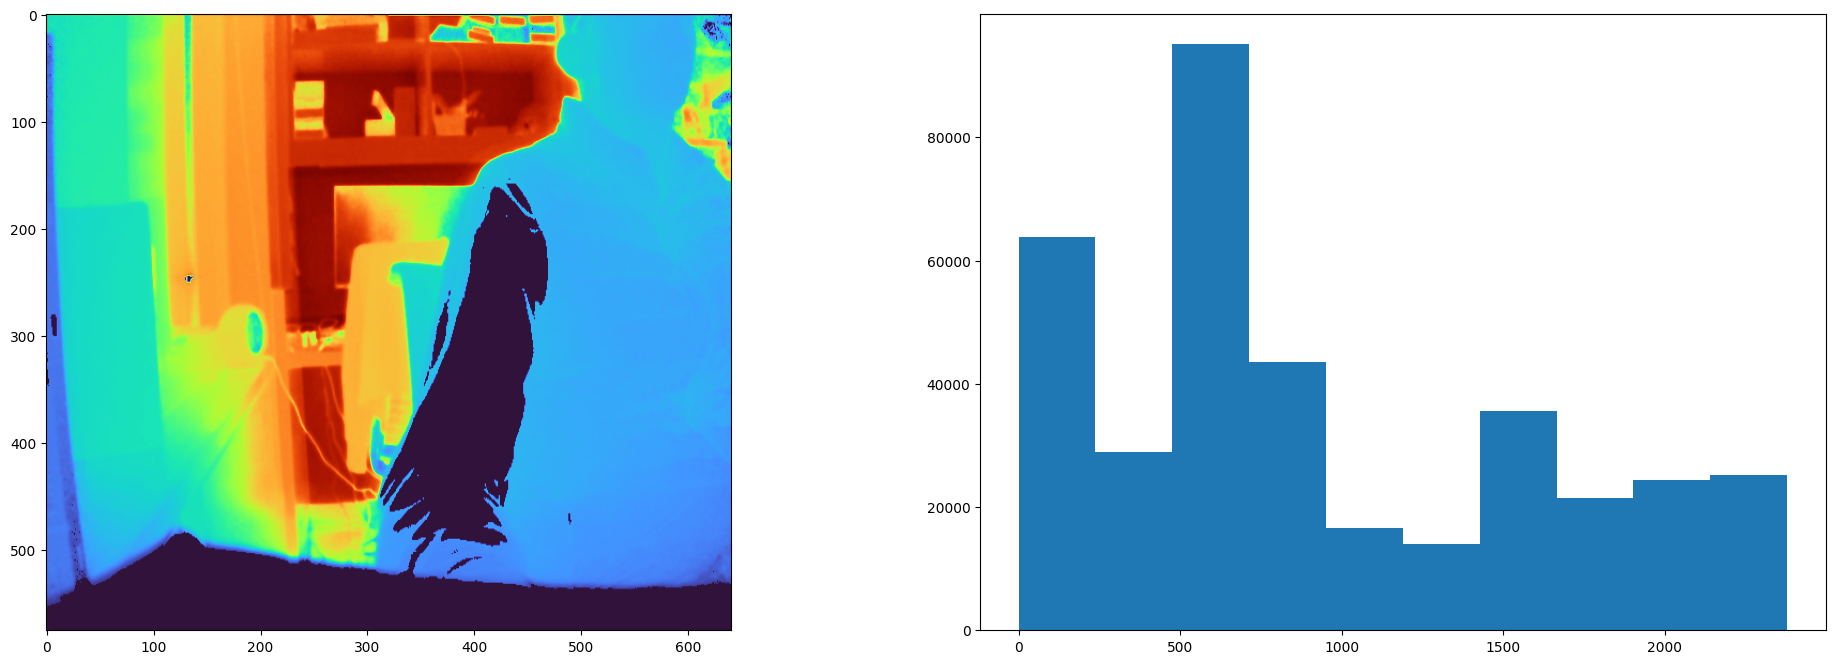

In [25]:
frames = read_frames(
    filename, 
    pixel_format = "gray16",
    frames = list(range(10))
)
fig, axs = plt.subplots(figsize=(24, 8), ncols =2)
axs[0].imshow(frames[1], cmap = 'turbo')
axs[1].hist(frames[1].flatten())

In [ ]:
filename

In [ ]:
frames.shape

libusb: error [udev_hotplug_event] ignoring udev action bind
